Calculate the time gap between three consecutive visits in each filter, and generate a set of combined histograms with all filters.  Derived from sims_maf_contrib/tutorials/Plotting Examples.ipynb

In [1]:
# Import modules.
import matplotlib.pyplot as plt
%matplotlib inline
import lsst.sims.maf.db as db
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.plots as plots
from lsst.sims.maf.metricBundles import MetricBundle, MetricBundleGroup, makeBundlesDictFromList
from mafContrib import kConsecutiveGapMetric

In [2]:
# Connect to databases.
runName = 'minion_1016'
opsdb = db.OpsimDatabase(runName + '_sqlite.db')
outDir = 'allfilters_test'
resultsDb = db.ResultsDb(outDir=outDir)

Set up and run non-dithered metric bundles. Use a lower value of nside to make the notebook run faster, although at lower spatial resolution.

In [3]:
nside = 16
# Set up metrics, slicer and summaryMetrics.
m1 = kConsecutiveGapMetric(k=2)
m2 = metrics.AveGapMetric()
slicer = slicers.HealpixSlicer(nside=nside)
summaryMetrics = [metrics.MinMetric(), metrics.MeanMetric(), metrics.MaxMetric(), 
                  metrics.MedianMetric(), metrics.RmsMetric(), 
                 metrics.PercentileMetric(percentile=25), metrics.PercentileMetric(percentile=75)]
# And I'll set a plotDict for the nvisits and coadded depth, because otherwise the DD fields throw the 
#  scale in the plots into too wide a range. 
#  (we could also generate plots, see this effect, then set the dict and regenerate the plots)
#nvisitsPlotRanges = {'xMin':0, 'xMax':300, 'colorMin':0, 'colorMax':300, 'binsize':5}
#coaddPlotRanges = {'xMin':24, 'xMax':28, 'colorMin':24, 'colorMax':28, 'binsize':0.02}

Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes


In [4]:
filterlist = ['u', 'g', 'r', 'i', 'z', 'y']
filterorder = {'u':0, 'g':1, 'r':2, 'i':3, 'z':4, 'y':5}

In [5]:
# Create metricBundles for each filter. 
# For ease of access later, I want to make a dictionary with 'kgap[filter]' first.
kgap = {}
avegap = {}
for f in filterlist:
    sqlconstraint = 'filter = "%s"' %(f)
    # Add displayDict stuff that's useful for showMaf to put things in "nice" order.
    displayDict = {'subgroup':'Undithered', 'order':filterorder[f], 'group':'kgap'}
    kgap[f] = MetricBundle(m1, slicer, sqlconstraint=sqlconstraint, runName=runName,
                              summaryMetrics=summaryMetrics, #plotDict=nvisitsPlotRanges,
                              displayDict=displayDict)
    displayDict['group'] = 'AveGap'
    avegap[f] = MetricBundle(m2, slicer, sqlconstraint=sqlconstraint, runName=runName,
                              summaryMetrics=summaryMetrics, #plotDict=nvisitsPlotRanges,
                              displayDict=displayDict)
    
blistAll = []
for f in filterlist:
    blistAll.append(kgap[f])
    blistAll.append(avegap[f])
bdict = makeBundlesDictFromList(blistAll)
# Set the metricBundleGroup up with all metricBundles, in all filters.
bgroup = MetricBundleGroup(bdict, opsdb, outDir=outDir, resultsDb=resultsDb)
bgroup.runAll()
bgroup.writeAll()
bgroup.plotAll()

Querying database with constraint filter = "i"
Found 541688 visits
Running:  ['minion_1016_AveGap_i_HEAL', 'minion_1016_kConsecutiveGap_i_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database with constraint filter = "r"
Found 538713 visits
Running:  ['minion_1016_AveGap_r_HEAL', 'minion_1016_kConsecutiveGap_r_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database with constraint filter = "y"
Found 446306 visits
Running:  ['minion_1016_AveGap_y_HEAL', 'minion_1016_kConsecutiveGap_y_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database with constraint filter = "g"
Found 246667 visits
Running:  ['minion_1016_kConsecutiveGap_g_HEAL', 'minion_1016_AveGap_g_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database with constraint filter = "z"
Found

/smallfiles/ebellm/anaconda/envs/maf/lib/python2.7/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "
/smallfiles/ebellm/anaconda/envs/maf/opt/lsst/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:60: UserWarning: Optimal bin calculation tried to make 996 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


monopole: 1.51237  dipole: lon: 81.6098, lat: -18.8978, amp: 2.65152
monopole: 1.51237  dipole: lon: 81.6098, lat: -18.8978, amp: 2.65152
Plotting complete.
Plotting figures with filter = "r" sqlconstraint now.


/smallfiles/ebellm/anaconda/envs/maf/opt/lsst/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:60: UserWarning: Optimal bin calculation tried to make 688 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


monopole: 3.00799  dipole: lon: 104.094, lat: -33.3581, amp: 8.54563
monopole: 3.00799  dipole: lon: 104.094, lat: -33.3581, amp: 8.54563
Plotting complete.
Plotting figures with filter = "y" sqlconstraint now.
monopole: 69.2102  dipole: lon: 82.8155, lat: 26.5374, amp: 81.7329
monopole: 69.2102  dipole: lon: 82.8155, lat: 26.5374, amp: 81.7329
Plotting complete.
Plotting figures with filter = "g" sqlconstraint now.
monopole: 35.4196  dipole: lon: 99.2672, lat: -30.1826, amp: 66.2848
monopole: 35.4196  dipole: lon: 99.2672, lat: -30.1826, amp: 66.2848
Plotting complete.
Plotting figures with filter = "z" sqlconstraint now.
monopole: 19.7608  dipole: lon: 78.158, lat: -23.7231, amp: 30.4023
monopole: 19.7608  dipole: lon: 78.158, lat: -23.7231, amp: 30.4023
Plotting complete.
Plotting figures with filter = "u" sqlconstraint now.
monopole: 575.393  dipole: lon: 90.9665, lat: 64.7773, amp: 301.548
monopole: 575.393  dipole: lon: 90.9665, lat: 64.7773, amp: 301.548
Plotting complete.


In [6]:
print 'Kgap --'
for f in filterlist:
    print kgap[f].summaryValues
print 'Avegap --'
for f in filterlist:
    print avegap[f].summaryValues

Kgap --
{'25th%ile': 22.35362399990845, 'Rms': 327.83618904769236, '75th%ile': 708.58976999997685, 'Min': 0.01000799989560619, 'Max': 743.17653600001358, 'Median': 670.38560399995185, 'Mean': 447.8955767299264}
{'25th%ile': 0.48255600000265986, 'Rms': 91.775048986466629, '75th%ile': 70.908324000018183, 'Min': 0.01000799989560619, 'Max': 574.66504799999529, 'Median': 0.95767200010595843, 'Mean': 52.21238613470446}
{'25th%ile': 0.4654620000437717, 'Rms': 11.048278976792464, '75th%ile': 1.1980620000249473, 'Min': 0.01000799989560619, 'Max': 80.757803999993484, 'Median': 0.62932800005364697, 'Mean': 5.2782090400792772}
{'25th%ile': 0.46093799997470342, 'Rms': 5.4951526902365275, '75th%ile': 0.75787200004560873, 'Min': 0.01000799989560619, 'Max': 47.387976000085473, 'Median': 0.59967599996889476, 'Mean': 2.0422292559100672}
{'25th%ile': 0.48720899998443201, 'Rms': 36.735459054507622, '75th%ile': 46.58909999995376, 'Min': 0.01000799989560619, 'Max': 168.92901600000914, 'Median': 2.9091359998

Now let's try to combine the histograms.

In [7]:
# Set more complicated plot labels directly in the bundles.
for f in filterlist:
    kgap[f].setPlotDict({'label':'%s  %1.f/%.1f/%1.f' %(f, kgap[f].summaryValues['25th%ile'], 
                                                    kgap[f].summaryValues['Median'], 
                                                   kgap[f].summaryValues['75th%ile'])})

1

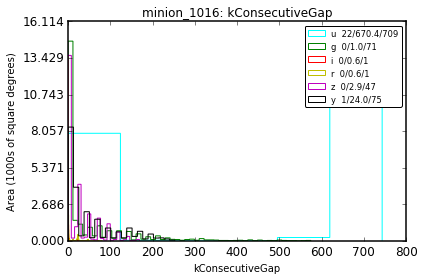

In [8]:
# Set up the plotHandler.
ph = plots.PlotHandler(outDir=outDir, resultsDb=resultsDb)
# Instantiate the healpix histogram plotter, since we'll use it a lot.
healpixhist = plots.HealpixHistogram()
ph.setMetricBundles(kgap)
# Add min/max values to the plots, which will be used for the combo histogram for nvisits.
#ph.setPlotDicts(nvisitsPlotRanges)
ph.plot(plotFunc=healpixhist)